In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0], 
           [0.5, -0.91, 0.26, -0.5], 
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = []
for nw, nb in zip(weights, biases):
  layer_outputs.append(np.dot(inputs, np.array(nw).T))
print(layer_outputs)

[array([ 2.8 ,  6.9 , -0.59]), array([-1.79 , -4.81 , -1.949]), array([ 1.885, -0.3  , -0.474])]


In [5]:
def create_data(points, classes):
    X = np.zeros((points * classes, 2))
    Y = np.zeros(points * classes, dtype='uint8')
    for cn in range(classes):
        ix = range(points * cn, points * (cn + 1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(cn * 4, (cn + 1) * 4, points) + np.random.randn(points) * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        Y[ix] = cn
    return X, Y

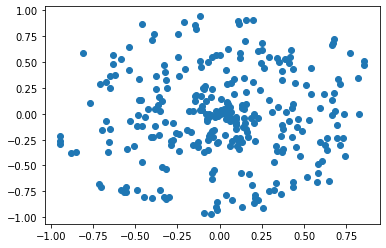

In [15]:
X, Y = create_data(100, 3)
plt.scatter(X[:,0], X[:,1])
plt.show()

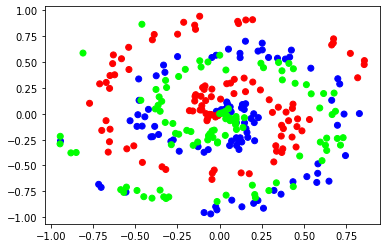

In [16]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap="brg")
plt.show()

In [7]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [9]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) 
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(t_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [3]:
np.random.seed(0)

X = [[1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

class Activation_Relu:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

In [26]:
X, y = create_data(100, 3)
print(X, y)

d1 = Layer_Dense(2, 3)
a1 = Activation_Relu()

d2 = Layer_Dense(3, 3)
a2 = Activation_Softmax()

d1.forward(X)
a1.forward(d1.output)

d2.forward(a1.output)
a2.forward(d2.output)

print(a2.output[:5])
print(len(a2.output), len(a2.output[0]))

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(a2.output, y)

print(loss)

[[-0.00000000e+00  0.00000000e+00]
 [-5.27368180e-03  8.61502672e-03]
 [-1.48117895e-02  1.37379952e-02]
 [ 4.84014301e-03  2.99139877e-02]
 [ 3.15229856e-02  2.52742529e-02]
 [ 2.52986410e-02  4.37119994e-02]
 [-6.17223577e-03  6.02909453e-02]
 [ 6.98217182e-02  1.11542597e-02]
 [ 6.88765868e-02  4.22606403e-02]
 [ 8.76011738e-02  2.43001473e-02]
 [ 9.53237378e-02  3.34129543e-02]
 [ 7.67097135e-02 -8.03822049e-02]
 [ 1.16871873e-01  3.21456620e-02]
 [ 1.03899358e-01  8.02998246e-02]
 [ 1.31154886e-01 -5.28805748e-02]
 [ 6.22958095e-02  1.38116159e-01]
 [ 1.58722377e-01 -3.04465244e-02]
 [ 1.71558497e-01  7.38033362e-03]
 [ 1.14597270e-01 -1.41157065e-01]
 [ 1.78822210e-01 -6.96820873e-02]
 [ 2.01499921e-01 -1.44894420e-02]
 [ 1.72641282e-01 -1.23249327e-01]
 [ 2.22221436e-01  5.91035636e-04]
 [-2.44292369e-02 -2.31035271e-01]
 [ 1.79268307e-01 -1.63194324e-01]
 [ 6.78106987e-02 -2.43250308e-01]
 [ 1.93789249e-01 -1.77252026e-01]
 [ 5.27145415e-02 -2.67584272e-01]
 [ 9.83437273e-02 -2